In [1]:
# Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"
# Include the output with (adjusted) R-squared and Root Mean Squared Error (RMSE)

# Other requirements 
# Assess linearity of model (parameters)
# Assess serial independence of errors
# Assess heteroskedasticity
# Assess normality of residual distribution
# Assess multicollinearity

# Outliers? Missing values? Categorical variables?

In [2]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib as plt

In [3]:
df = pd.read_csv('/Users/schottmadison/DSDJ/cancer_prediction/cancer_reg.csv')

In [12]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [13]:
df.shape

(3047, 34)

In [5]:
df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [1]:
# drop PctSomeCol18_24 because of high number of null values
# see if PctEmployed16_Over is inverse with PctUnemployed16_Over (NaN in first means in second?)
# PctPrivateCoverageAlone + PctEmpPrivCoverage should = private coverage? Coverage accounted for twice with these variables?

In [4]:
print(df[df['PctSomeCol18_24'].isna()][['PctBachDeg18_24', 'PctNoHS18_24', 'PctHS18_24']].mean())
print(df[['PctBachDeg18_24', 'PctNoHS18_24', 'PctHS18_24']].mean())
        

PctBachDeg18_24     6.168315
PctNoHS18_24       18.274136
PctHS18_24         35.063457
dtype: float64
PctBachDeg18_24     6.158287
PctNoHS18_24       18.224450
PctHS18_24         35.002068
dtype: float64


In [84]:
# nearly the same average of bachelor degrees and no high school whether or not some college is a null value
print(df['PctSomeCol18_24'].mean())
print(df['PctSomeCol18_24'].max())
print(df['PctSomeCol18_24'].min())

40.9770341207349
79.0
7.1


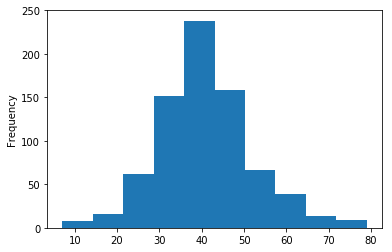

In [5]:
df['PctSomeCol18_24'].plot.hist()

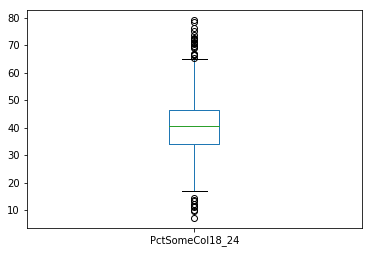

In [6]:
df['PctSomeCol18_24'].plot.box()

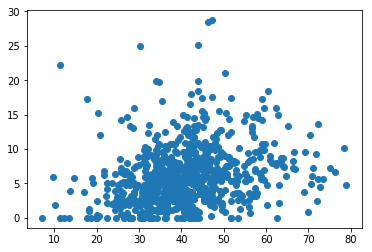

In [7]:
# both the box plot and histagram show a normal distribution for this variable
import matplotlib.pyplot as plt

plt.scatter(df['PctSomeCol18_24'], df['PctBachDeg18_24'])

In [8]:
for value in (df['PctBachDeg18_24'] + df['PctNoHS18_24'] + df['PctHS18_24'] + df['PctSomeCol18_24']):
    if value > 100:
        print('not possible')
        print(value)

not possible
100.10000000000001
not possible
100.10000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.10000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.10000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.00000000000001
not possible
100.1
not possible
100.1
not possible
100.10000000000001
not possible
100.10000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.10000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.00000000000001
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possible
100.1
not possi

In [9]:
# we can assume these values are over 100 due to the rounding of the other values
# because most of the some college data is missing and this number is accounted for in the other columns, it would be best to drop this column

df.drop(columns=['PctSomeCol18_24'], inplace=True)

In [10]:
# check to make sure % of highest degree as hs and bachelor degree does not exceed 100

for value in (df['PctHS25_Over'] + df['PctBachDeg25_Over']):
    if value > 100:
        print('not possible')

In [11]:
# we also want to use this function for checking unemployed and employed numbers
# this shouldn't exceed 100 because people cannot be both unemployed and employed

for value in (df['PctEmployed16_Over'] + df['PctUnemployed16_Over']):
    if value > 100:
        print('not possible')

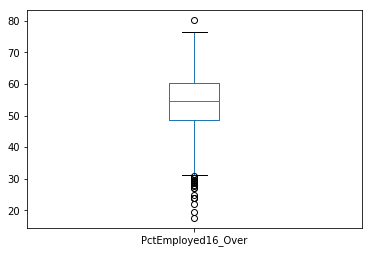

In [12]:
df['PctEmployed16_Over'].plot.box()

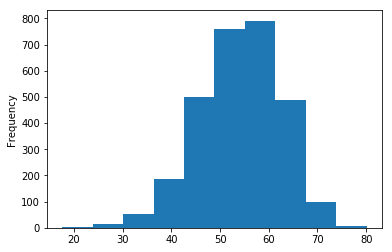

In [13]:
df['PctEmployed16_Over'].plot.hist()

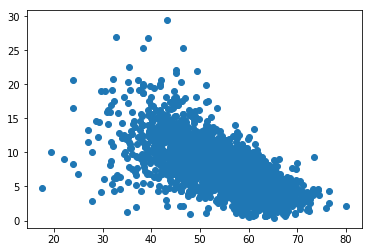

In [14]:
plt.scatter(df['PctEmployed16_Over'], df['PctUnemployed16_Over'])

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_wo_nulls = df[df['PctEmployed16_Over'].notna()][['PctEmployed16_Over', 'PctUnemployed16_Over']]

X_train, X_test, y_train, y_test = train_test_split(df_wo_nulls['PctEmployed16_Over'].values.reshape(-1,1), df_wo_nulls['PctUnemployed16_Over'].values.reshape(-1,1))

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_predict = model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test, y_predict))
# this r squared coefficient indicates that this linear model is a poor fit of the data

print(mean_squared_error(y_test, y_predict))
# high standard deviation of the variance in the difference

0.41128137123521435
5.725518098060478


In [95]:
employed_16_mean = df['PctEmployed16_Over'].mean()

# replace na values with mean of the column since it is normally distributed 
df['PctEmployed16_Over'].fillna(employed_16_mean, inplace=True)

df['PctEmployed16_Over'].isna().sum()

0